In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
states = pd.read_csv('states.txt')

In [3]:
df_header = df.columns
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


# Data Cleaning

To follow conventional programming practice, I will convert all columns to snake case (eg. snake_case) format for ease of readability and consistency. 

Notice, that some of our columns are capitalized, includes hypens, or contains number. We will do the following:
 * Lowercase all letters
 * for any spaces, we will include underscore (_)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('-','_')
df.head(3)

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8


**Observe Data**

Since we will be comparing states, it's important we analyze the state column

In [5]:
print('Unique state values in our data: ', len(df['state'].unique()))

print('Total states in USA: ',len(states)) # True value of states

Unique state values in our data:  52
Total states in USA:  51


We realize that our datasets contains an additional state (total 52). We could leave it as it is. However, we want to avoid discrepancies later down our analysis thus it's better to **identify and rearrange** our datasets.

Identify that one state that is not a state

In [6]:
state_outlier = [state for state in df['state'].unique() if state not in states['State'].unique()]
print('Not a state: ',state_outlier)

Not a state:  ['United States']


In this EDA, we don't consider United States to be a state. We will exclude 'United States' from our state column.

In [7]:
df = df[df['state']!= 'United States']
df.head()

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


Almost done. We need to add a new column called 'abbv_state' that abbreviates the state with respect to each row.

Since states.csv is a Dataframe, we can take advantage of its index and key - to map abbreviated states. We will then add these abbreviated states in our new column on our main dataframe

In [8]:
def label(element):
    for idx,key in enumerate(states['State']):
        if key == element:
            element = states['Abbreviation'].iloc[idx]
        
    return element

df['abbv_state'] = df['state'].apply(label)

df.head()

,year,113_cause_name,cause_name,state,deaths,age_adjusted_death_rate,abbv_state
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6,VT
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7,VT
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8,VT
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8,DC
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1,AZ


Let's look at our cause of deaths

In [9]:
df['cause_name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer',
       'All causes'], dtype=object)

Note: 'All cause' deaths are too vague in this analysis. Because we are trying to find specific cause of deaths, 'all cause' deaths could be cumulative of all the deaths. Unless the author of the data explains what it means - we shall exclude any rows that includes 'All Deaths' to avoid skewness.

In [10]:
df = df[df['cause_name']!='All causes']
df['cause_name'].unique()

array(['Kidney disease', 'Suicide', "Alzheimer's disease",
       'Influenza and pneumonia', 'Diabetes', 'CLRD',
       'Unintentional injuries', 'Stroke', 'Heart disease', 'Cancer'],
      dtype=object)

Quick summary of our datasets to make sure our dataframe is ready to be analyzed. 

In [11]:
print(df.info())
print('\n')
print('Check any null datas:')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9180 entries, 0 to 9359
Data columns (total 7 columns):
year                       9180 non-null int64
113_cause_name             9180 non-null object
cause_name                 9180 non-null object
state                      9180 non-null object
deaths                     9180 non-null int64
age_adjusted_death_rate    9180 non-null float64
abbv_state                 9180 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 573.8+ KB
None


Check any null datas:


year                       0
113_cause_name             0
cause_name                 0
state                      0
deaths                     0
age_adjusted_death_rate    0
abbv_state                 0
dtype: int64

**Insight:**
* Our data consist of 9180 rows, total of 7 columns
* No null values
* All datas have appropriate numeric or object values for each column

Our dataset is ready to be analyzed! 

# Cumulative Deaths 

To start off our analysis, let's have a better understanding of our datasets. 
We'll find the cumulative deaths from each cause. 

cause_name
Heart disease              11575183
Cancer                     10244536
Stroke                      2580140
CLRD                        2434726
Unintentional injuries      2177884
Alzheimer's disease         1373412
Diabetes                    1316379
Influenza and pneumonia     1038969
Kidney disease               807980
Suicide                      649843
Name: deaths, dtype: int64


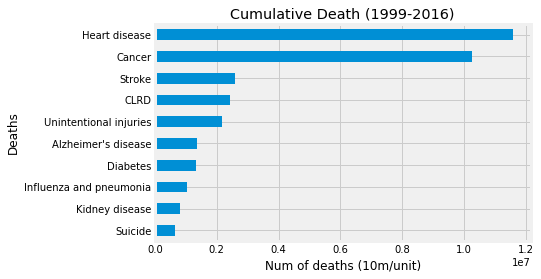

In [12]:
# Set up series of deaths by cause_name
total_death_by_cause = df.groupby(by='cause_name').sum()['deaths'].sort_values(ascending=True)
print(total_death_by_cause.sort_values(ascending=False))

# Plot horizontal graph
total_death_by_cause.plot(kind = 'barh')

plt.title('Cumulative Death (1999-2016)',loc='center')
plt.ylabel('Deaths')
plt.xlabel('Num of deaths (10m/unit)')
#plt.xscale('log')

plt.show()


Let's find out the cumulative deaths to better represent in terms of percentage

In [13]:
# Find the percentage of deaths 
dict_total_death_by_cause = dict(total_death_by_cause)

for val in dict_total_death_by_cause:
    percentage = dict_total_death_by_cause[val]/total_death_by_cause.sum()
    dict_total_death_by_cause[val] = percentage

dict_total_death_by_cause

{'Suicide': 0.019001784026060137,
 'Kidney disease': 0.0236258010894571,
 'Influenza and pneumonia': 0.030380052640055638,
 'Diabetes': 0.038491680997473264,
 "Alzheimer's disease": 0.04015935880327911,
 'Unintentional injuries': 0.06368258394998785,
 'CLRD': 0.07119279212768821,
 'Stroke': 0.07544478133487442,
 'Cancer': 0.29955613974328876,
 'Heart disease': 0.33846502528783545}

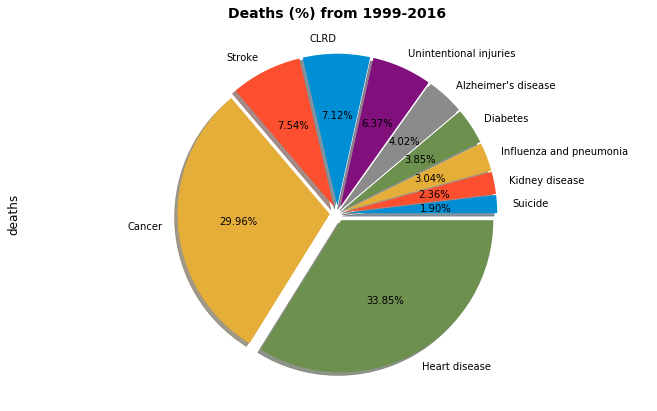

In [14]:
#Pie chart
explode = (.05,.05,.05,.05,.05,.05,.05,.05,.05,.05)

fig = plt.figure(figsize=(10,7))
plt.gca().axis("equal")
total_death_by_cause.plot(kind = 'pie',explode=explode,shadow=True,autopct='%1.2f%%',fontsize=10,radius=1)
plt.title('Deaths (%) from 1999-2016', weight='bold', size=14)
plt.show()

**Insight:**
* Leading cause of death in America: **Heart Disease** (34%)
* Cancer and Heart diseases are accountable for over 20 million deaths (64%) over 17 years. That's ___1.2 million deaths___ every year. On context, the third highest, stroke, is behind Cancer by 4.2x
* The lowest death - Suicide, only accounts 1.9% of the total deaths. An average deaths of 38,000 deaths every year

# Understanding Cumulative Deaths Distribution

Now that we know the cumulative deaths, let's dive in more.
Let's look at the distribution of each cause of deaths from 1999-2016.

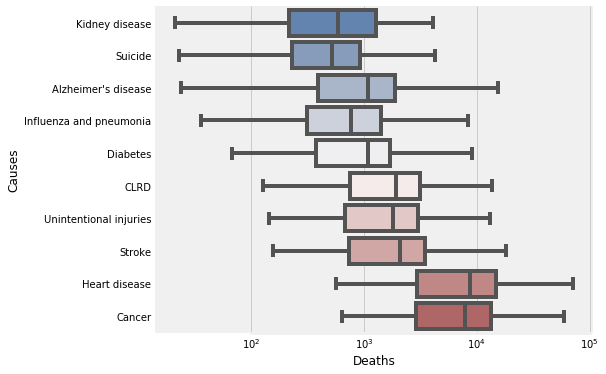

In [15]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(x="deaths", y="cause_name", data=df,
            whis="range", palette="vlag")


ax.xaxis.grid(True)
ax.set(ylabel="Causes")
ax.set(xlabel='Deaths')
sns.despine(trim=True, left=True)


plt.show()

Boxplot allows us to display descriptive statistics of the data. It displays mean, median, min, max, Q1(25th percentile),Q2(75th percentile) and outliers. Visually, it answers datasets' symmetrical, how tightly it's grouped, and if there's obvious skewness.

**Insight:**
* Boxplot above suggests that the datas are skewed. Understandbly, since we're taking all values from each death from (1999-2016) and quantifying as a whole on a boxplot. 
* However, note that these values are according by state to state. A median deaths in California from Heart Disease is not  comparable to a death rate from Heart Disease in Alabama. We will consider the population with its respective state later on.
* Nevertheless, the above diagram indicates that none of the causes are symmetric and have given us a brief descriptive idea of the range of each death


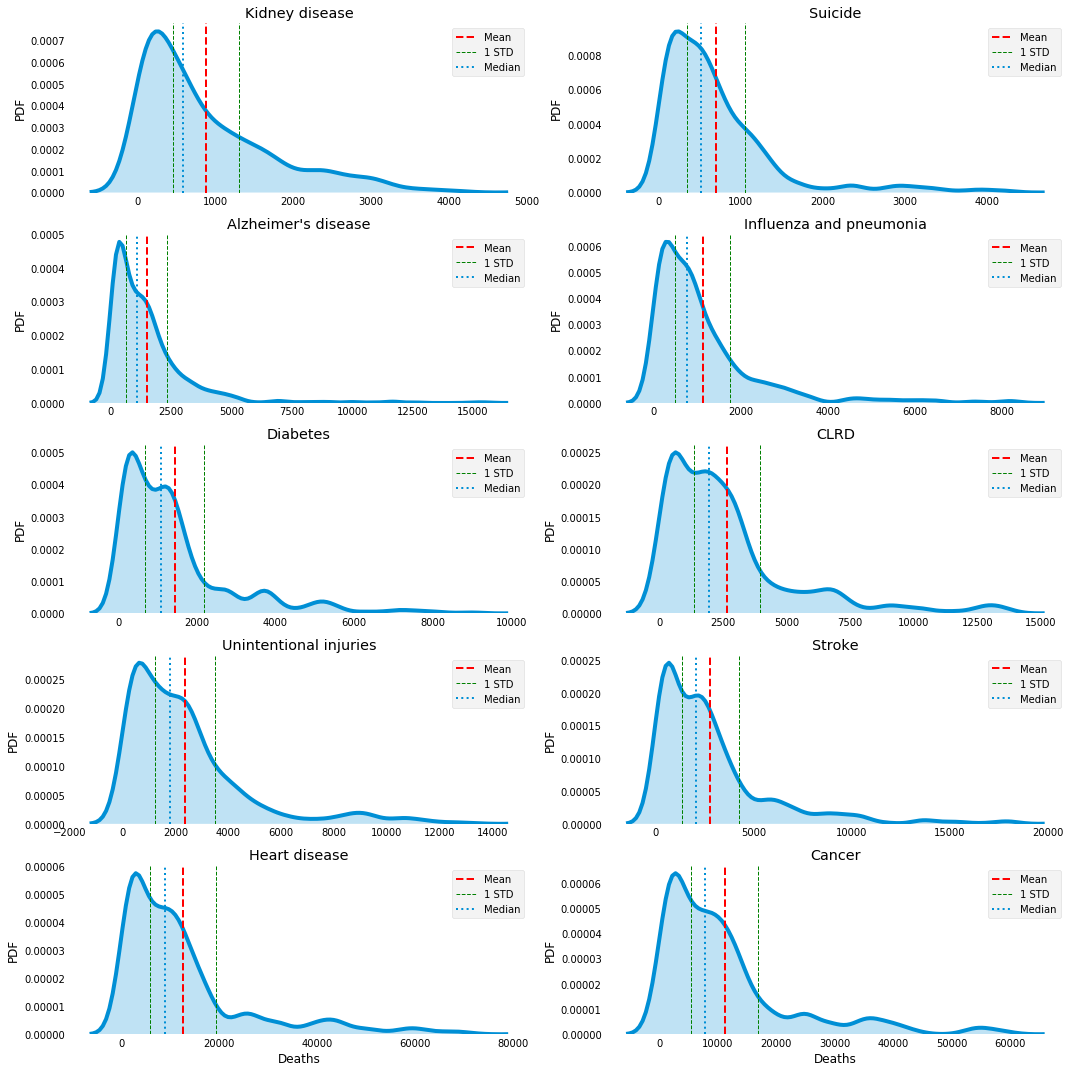

In [22]:
def create_distplot(col):
    col = df[df['cause_name']==col]['deaths']
    return col

fig = plt.figure(figsize= (15,15))

for idx, key in enumerate(df['cause_name'].unique()): 
    ax = fig.add_subplot(5,2,idx+1)
    value = create_distplot(key)
    sns.distplot(value,hist=False,kde_kws={'shade':True},bins=100)
   
    std_val_half = np.std(value)/2
    
    ax.set_xlabel('')
    ax.set_ylabel('PDF')
    ax.set_title(key)
    ax.grid(False)
    ax.set_facecolor("white")
    ax.axvline(x=np.mean(value),lw =2,c='red',ls='--',label='Mean')
    ax.axvline(x=np.mean(value)+std_val_half,lw =1,c='green',ls='--',label='1 STD')
    ax.axvline(x=np.mean(value)-std_val_half,lw =1,c='green',ls='--')
    ax.axvline(x=np.median(value),lw=2,label='Median',ls=':')
    plt.legend()
    
    if idx==8:
        ax.set_xlabel('Deaths')
    elif idx ==9:
        ax.set_xlabel('Deaths')
    
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        

plt.tight_layout()
plt.show()


**Insight:**
* The graphs above indicates Right-skewed distribution with the charateristic of: Mean > Median > Mode

# Death Trend From 1999 - 2016

In this topic, we want to visualize the death trends over the years. For simplicity, we'll look at the cumulative death for each year.

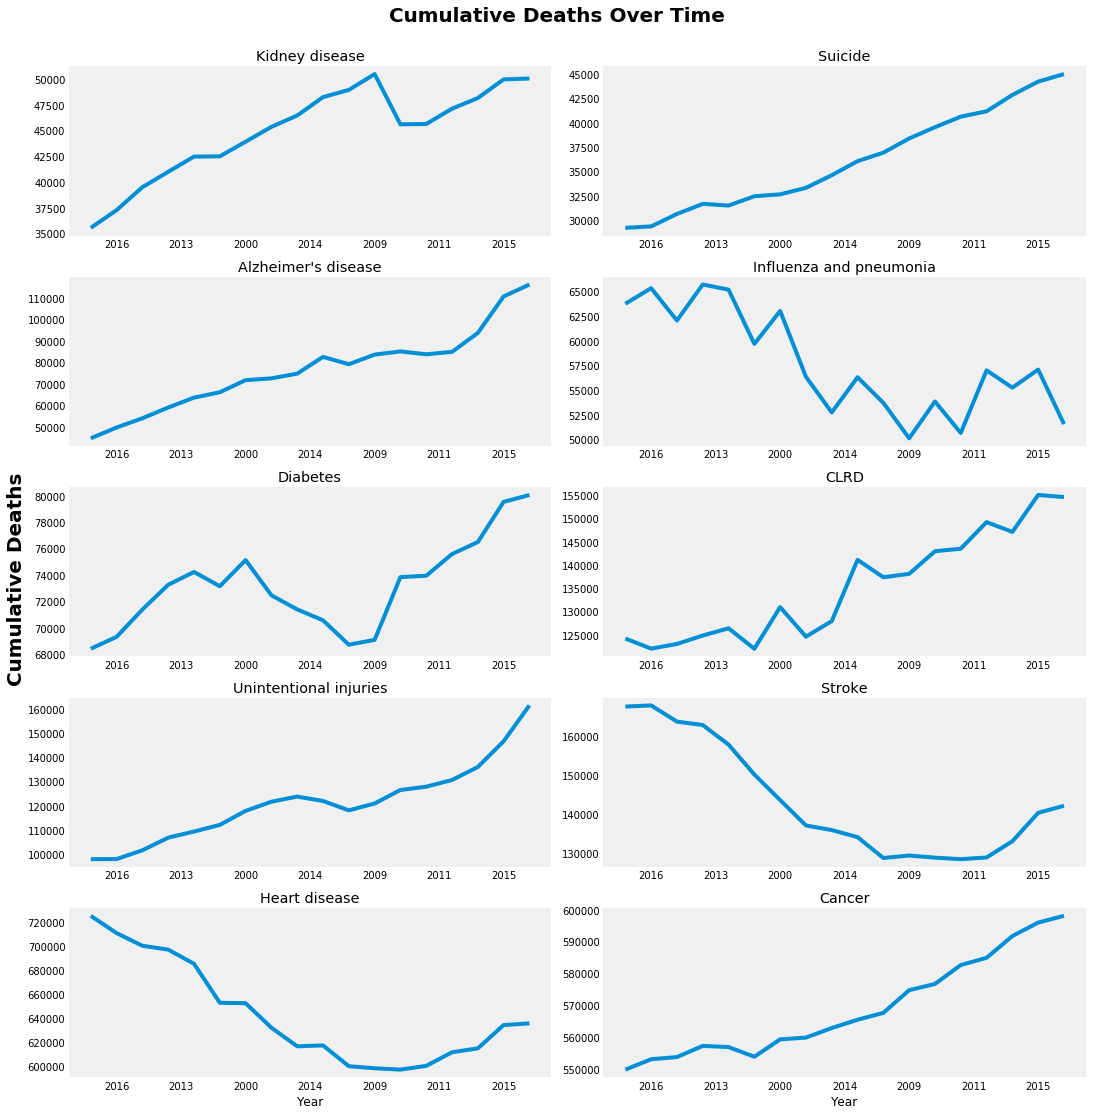

In [24]:
def retrieve_val_deaths(val):
    return df[df['cause_name']==val].groupby(by='year')['deaths'].sum()

fig = plt.figure(figsize=(15,15))

for idx,val in enumerate(df['cause_name'].unique()):
    ax = fig.add_subplot(5,2,idx+1)
    ax.plot(retrieve_val_deaths(val))
    ax.grid(False)
    ax.set_xticklabels(df['year'].unique())
    #ax.set_xticklabels('')    
   
    ax.set_title(val)
    #ax.set_xlabel('')
  
    #ax.set_title(val)
    
    if idx==8:
        ax.set_xlabel('Year')
        ax.set_xticklabels(df['year'].unique())

    elif idx ==9:
        ax.set_xticklabels(df['year'].unique())
        ax.set_xlabel('Year')
    
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
fig.suptitle('Cumulative Deaths Over Time',y=1.03,fontsize = 20,fontweight = 'bold')
fig.text(0, 0.5, 'Cumulative Deaths', ha='center', va='center', rotation='vertical',fontsize=20,fontweight = 'bold')

plt.tight_layout()
plt.show()